In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as st
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv("Baseball.csv")
ds

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
ds.shape

(30, 17)

In [4]:
ds.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

ds.head(5)

# To check null values

In [5]:
ds.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values we can proceed further

# Checking Datatypes

In [6]:
ds.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [7]:
ds.drop_duplicates()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [8]:
ds.shape

(30, 17)

# EDA PROCESS

<AxesSubplot:xlabel='W', ylabel='Density'>

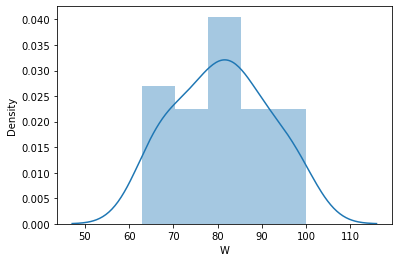

In [9]:
sns.distplot(ds['W'])

<AxesSubplot:xlabel='R', ylabel='Density'>

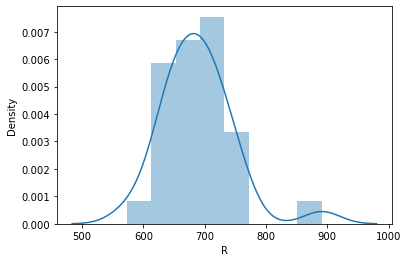

In [10]:
sns.distplot(ds['R'])

<AxesSubplot:xlabel='AB', ylabel='Density'>

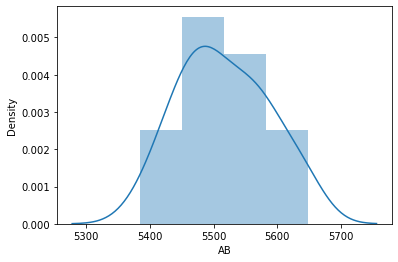

In [11]:
sns.distplot(ds['AB'])

<AxesSubplot:xlabel='H', ylabel='Density'>

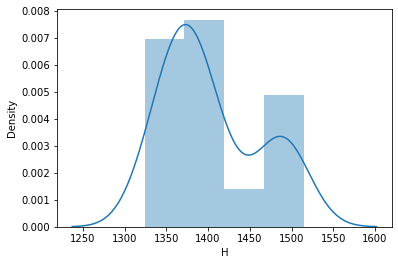

In [12]:
sns.distplot(ds['H'])

<AxesSubplot:xlabel='2B', ylabel='Density'>

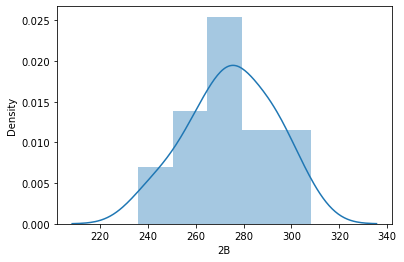

In [13]:
sns.distplot(ds['2B'])

<AxesSubplot:xlabel='3B', ylabel='Density'>

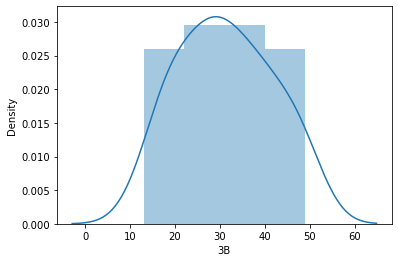

In [14]:
sns.distplot(ds['3B'])

<AxesSubplot:xlabel='HR', ylabel='Density'>

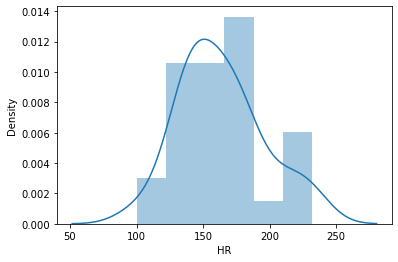

In [15]:
sns.distplot(ds['HR'])

<AxesSubplot:xlabel='BB', ylabel='Density'>

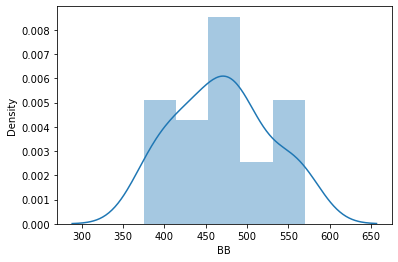

In [16]:
sns.distplot(ds['BB'])

<AxesSubplot:xlabel='SO', ylabel='Density'>

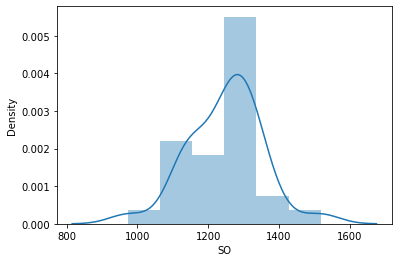

In [17]:
sns.distplot(ds['SO'])

<AxesSubplot:xlabel='SB', ylabel='Density'>

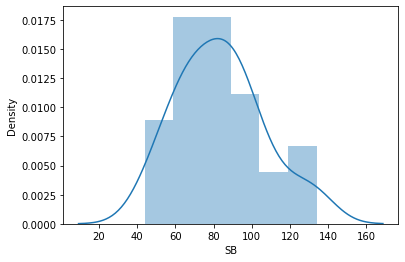

In [18]:
sns.distplot(ds['SB'])

<AxesSubplot:xlabel='RA', ylabel='Density'>

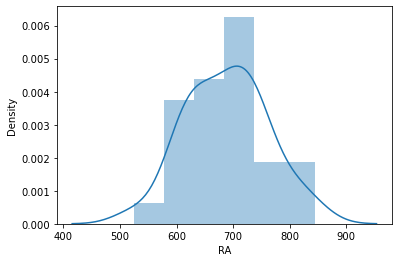

In [19]:
sns.distplot(ds['RA'])

<AxesSubplot:xlabel='ER', ylabel='Density'>

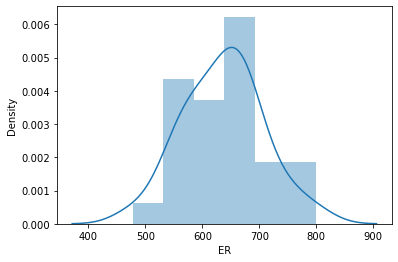

In [20]:
sns.distplot(ds['ER'])

<AxesSubplot:xlabel='ERA', ylabel='Density'>

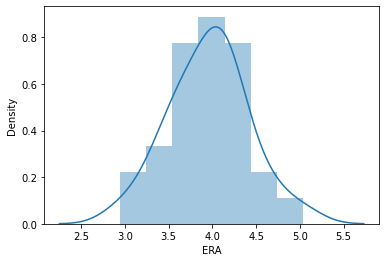

In [21]:
sns.distplot(ds['ERA'])

<AxesSubplot:xlabel='CG', ylabel='Density'>

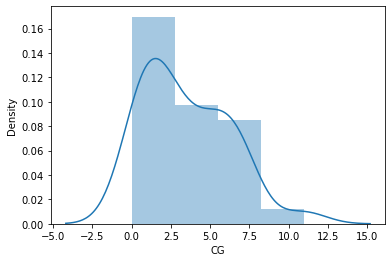

In [22]:
sns.distplot(ds['CG'])

<AxesSubplot:xlabel='SHO', ylabel='Density'>

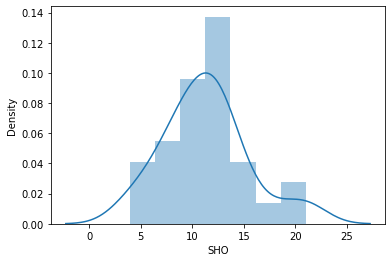

In [23]:
sns.distplot(ds['SHO'])

<AxesSubplot:xlabel='SV', ylabel='Density'>

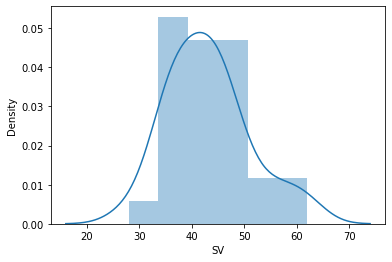

In [24]:
sns.distplot(ds['SV'])

<AxesSubplot:xlabel='E', ylabel='Density'>

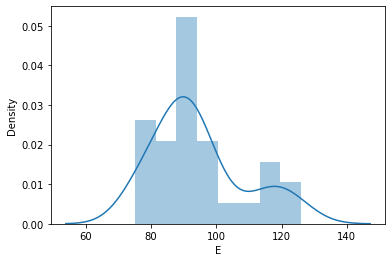

In [25]:
sns.distplot(ds['E'])

# To check Outliers

W         AxesSubplot(0.125,0.536818;0.0545775x0.343182)
R      AxesSubplot(0.190493,0.536818;0.0545775x0.343182)
AB     AxesSubplot(0.255986,0.536818;0.0545775x0.343182)
H      AxesSubplot(0.321479,0.536818;0.0545775x0.343182)
2B     AxesSubplot(0.386972,0.536818;0.0545775x0.343182)
3B     AxesSubplot(0.452465,0.536818;0.0545775x0.343182)
HR     AxesSubplot(0.517958,0.536818;0.0545775x0.343182)
BB     AxesSubplot(0.583451,0.536818;0.0545775x0.343182)
SO     AxesSubplot(0.648944,0.536818;0.0545775x0.343182)
SB     AxesSubplot(0.714437,0.536818;0.0545775x0.343182)
RA      AxesSubplot(0.77993,0.536818;0.0545775x0.343182)
ER     AxesSubplot(0.845423,0.536818;0.0545775x0.343182)
ERA          AxesSubplot(0.125,0.125;0.0545775x0.343182)
CG        AxesSubplot(0.190493,0.125;0.0545775x0.343182)
SHO       AxesSubplot(0.255986,0.125;0.0545775x0.343182)
SV        AxesSubplot(0.321479,0.125;0.0545775x0.343182)
E         AxesSubplot(0.386972,0.125;0.0545775x0.343182)
dtype: object

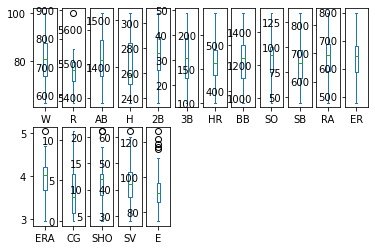

In [26]:
ds.plot(kind='box',subplots=True,layout=(2,12))

There are outliers present in E,SV,SHO,R columns 

#    Correlation

In [27]:
ds.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [28]:
ds.corr()['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

Correlation using heatmap:

<AxesSubplot:>

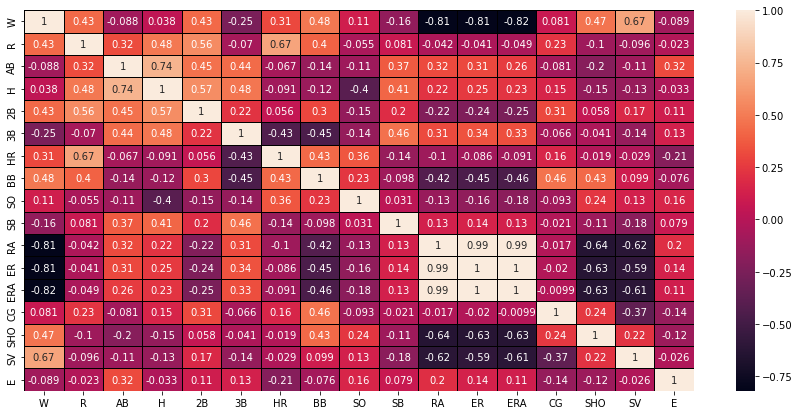

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(ds.corr(),annot=True,linewidth=0.5,linecolor='black')

Outcomes of Correlation



# Descriptive statistics

In [30]:
round(ds.describe()[1:].transpose(),2)

,mean,std,min,25%,50%,75%,max
W,80.97,10.45,63.00,74.00,81.00,87.75,100.00
R,688.23,58.76,573.00,651.25,689.00,718.25,891.00
AB,5516.27,70.47,5385.00,5464.00,5510.00,5570.00,5649.00
H,1403.53,57.14,1324.00,1363.00,1382.50,1451.50,1515.00
2B,274.73,18.10,236.00,262.25,275.50,288.75,308.00
3B,31.30,10.45,13.00,23.00,31.00,39.00,49.00
HR,163.63,31.82,100.00,140.25,158.50,177.00,232.00
BB,469.10,57.05,375.00,428.25,473.00,501.25,570.00
SO,1248.20,103.76,973.00,1157.50,1261.50,1311.50,1518.00
SB,83.50,22.82,44.00,69.00,83.50,96.50,134.00


In [31]:
ds.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Outcomes of Describe of datasets:
    
    

In [32]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


From the above code we can have the columns datatype and memory used by the dataframe. 

# TO CHECK SKEWNESS

In [33]:
ds.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Outcome of skewness
skewness threshold is taken is +/-0.65
Columns which are having skewness

R
CG
E
SV
H

# Normal Distribution Curve

<AxesSubplot:xlabel='R', ylabel='Density'>

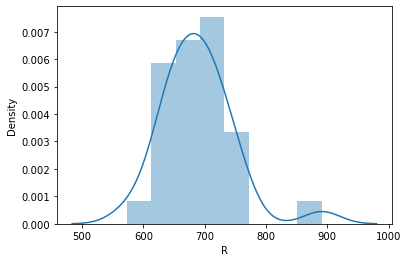

In [34]:
sns.distplot(ds["R"])

<AxesSubplot:xlabel='CG', ylabel='Density'>

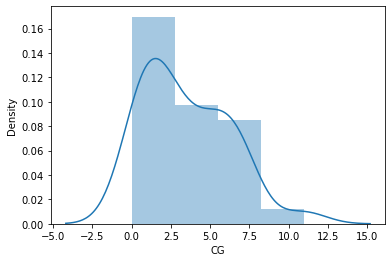

In [35]:
sns.distplot(ds["CG"])

<AxesSubplot:xlabel='E', ylabel='Density'>

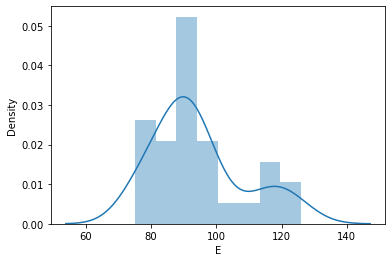

In [36]:
sns.distplot(ds["E"])

<AxesSubplot:xlabel='SV', ylabel='Density'>

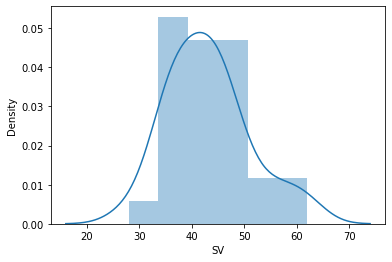

In [37]:
sns.distplot(ds["SV"])

<AxesSubplot:xlabel='H', ylabel='Density'>

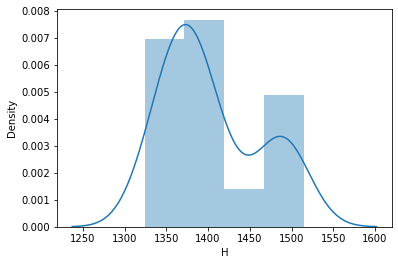

In [38]:
sns.distplot(ds["H"])

The data of above columns are not normalised.
Plot is Bimodal i.e have 2 modes. The building blocks are out of normalised curve.

The normal distribution shows that the data is skewed.

# DATA CLEANING

In [39]:
ds.corr()['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

In [40]:
delete=pd.DataFrame([["0.080533","CG","NO","alot"],["-0.089485","E","No"," alot"],["0.037612","H","NO","alot"]],
                   columns=["Correlation with Target","Column Name","Normalised","Outliers"])
delete

,Correlation with Target,Column Name,Normalised,Outliers
0,0.080533,CG,NO,alot
1,-0.089485,E,No,alot
2,0.037612,H,NO,alot


In [41]:
ds=ds.drop(["E","CG","H"],axis=1)
ds

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,56
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35
5,93,891,5509,308,17,232,570,1151,88,670,609,3.80,10,34
6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,4,48
7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,10,43
8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,12,60
9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,10,40


# Removing Outliers

In [42]:
from scipy.stats import zscore

In [43]:
z=np.abs(zscore(ds))
threshold=3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [44]:
ds_new=ds[(z<3).all(axis=1)]
ds_new

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,56
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35
6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,4,48
7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,10,43
8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,12,60
9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,10,40
10,88,751,5511,279,32,172,503,1233,101,733,680,4.24,9,45


In [45]:
np.abs(zscore(ds_new))

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV
0,1.416025,0.959398,0.830084,1.556538,1.010845,0.765863,1.536359,2.727623,0.905953,0.664514,0.511148,0.511388,0.813262,1.643157
1,0.239947,0.331147,0.702831,0.201171,1.208917,0.181389,0.495021,0.121896,0.585315,0.154638,0.232161,0.238952,0.159299,0.211006
2,0.043934,0.274666,1.100253,1.733325,0.276617,0.697101,1.252941,0.925866,0.116458,0.678397,0.754153,0.643801,0.326982,0.700362
3,0.446099,1.329231,0.233951,0.800621,0.474688,0.869006,1.145857,0.201246,0.673037,0.168522,0.089217,0.040333,0.570122,0.830557
4,0.642112,0.174084,1.255894,0.908319,1.704094,0.353293,0.197495,0.072935,0.015124,1.584683,1.561540,1.496876,0.159299,1.090948
6,0.631973,1.856900,0.716535,0.093474,1.266972,1.743939,1.643442,0.240414,0.892341,0.126870,0.217866,0.150677,1.785822,0.601593
7,0.043934,0.712585,0.447345,1.625627,1.167936,1.915843,0.885522,0.777970,1.725697,0.057451,0.132100,0.194815,0.326982,0.049384
8,0.054073,0.835605,0.447345,0.260100,0.020490,0.196801,0.550807,0.572335,0.160319,0.650630,0.468265,0.489319,0.159299,2.163939
9,0.250086,1.497899,1.752672,1.202964,0.119526,0.009484,0.230197,1.013995,0.541454,0.890486,0.818231,0.768604,0.326982,0.439971
10,0.729980,1.565212,0.078310,0.319029,0.020490,0.368705,0.695081,0.181661,0.774370,0.612808,0.618110,0.614123,0.570122,0.211006


In [46]:
type(z)

pandas.core.frame.DataFrame

In [47]:
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [48]:
z.iloc[9]

W      0.288649
R      1.034489
AB     1.785913
2B     1.082929
3B     0.165423
HR     0.084163
BB     0.158660
SO     0.982204
SB     0.557246
RA     0.913544
ER     0.843461
ERA    0.792164
SHO    0.320914
SV     0.396360
Name: 9, dtype: float64

In [49]:
len(np.where(z>3)[0])

1

In [50]:
ds_new=ds[(z<3).all(axis=1)]

In [51]:
print("Old DataFrame",ds.shape)
print("New DataFrame",ds_new.shape)
print("total_dropped_rows",ds.shape[0]-ds_new.shape[0])

Old DataFrame (30, 14)
New DataFrame (29, 14)
total_dropped_rows 1


# Percentage data loss:

In [52]:
import math
loss_percent=(30-29)/30*100
print(loss_percent,"%")

3.3333333333333335 %


# Seperation of Data

In [53]:
x=ds_new.drop('W',axis=1)
x

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV
0,724,5575,300,42,139,383,973,104,641,601,3.73,8,56
1,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45
2,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38
3,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37
4,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35
6,764,5567,272,19,212,554,1227,63,698,652,4.03,4,48
7,713,5485,246,20,217,418,1331,44,693,646,4.05,10,43
8,644,5485,278,32,167,436,1310,87,642,604,3.74,12,60
9,748,5640,294,33,161,478,1148,71,753,694,4.31,10,40
10,751,5511,279,32,172,503,1233,101,733,680,4.24,9,45


In [54]:
y=ds_new['W']
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

# Transforming data to remove skewness:


In [55]:
from sklearn.preprocessing import power_transform

In [56]:
x=power_transform(x,method="yeo-johnson")

In [57]:
type(x)

numpy.ndarray

In [58]:
x

array([[ 9.62543504e-01,  8.38257983e-01,  1.68518793e+00,
         1.00615029e+00, -7.41927000e-01, -1.60519802e+00,
        -2.55061247e+00,  9.36131648e-01, -6.60978697e-01,
        -5.08052224e-01, -5.09292146e-01, -7.87002186e-01,
         1.53275292e+00],
       [ 2.98863300e-01, -6.92877447e-01,  1.38197902e-01,
         1.18522654e+00, -1.09958425e-01, -4.62095966e-01,
         9.36832915e-02, -5.16377335e-01,  1.60225829e-01,
         2.35800488e-01,  2.41440214e-01,  2.36736538e-01,
         3.12020186e-01],
       [-3.12105130e-01, -1.11045984e+00,  1.90738550e+00,
        -2.28819392e-01, -6.64354121e-01,  1.23209786e+00,
        -9.35611465e-01,  2.25038365e-01, -6.74967476e-01,
        -7.52213881e-01, -6.42097599e-01, -2.52844176e-01,
        -6.64136739e-01],
       [-1.30829774e+00,  2.59829043e-01, -8.37664770e-01,
        -4.32227907e-01, -8.60039342e-01, -1.16272085e+00,
        -2.30682707e-01, -6.18421529e-01,  1.74076810e-01,
         9.30906974e-02,  4.30132461e

In [59]:
x.ndim

2

Standardization already applied when power transformation is apllied.

In [60]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#x=sc.fit_transform(x)
#x

In [61]:
x.mean()

-9.025260422797704e-05

In [62]:
round(-3.5338*10**(-19),18)

-0.0

In [63]:
x.std()

1.0000000488731944

In [64]:
x.shape

(29, 13)

In [65]:
y.shape

(29,)

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

In [67]:
lr=LinearRegression()

In [68]:
lr.fit(x_train,y_train)

LinearRegression()

In [69]:
lr.predict(x_test)

array([83.99807698, 89.84143647, 93.18294642, 61.28881739, 78.93000651,
       82.82352201])

In [70]:
lr.intercept_

80.41247787413754

In [71]:
lr.score(x_train,y_train)

0.9684932754953625

In [72]:
#predicting the value
pred=lr.predict(x_test)
print('Predictes result price:',pred)
print('Actual price',y_test)

Predictes result price: [83.99807698 89.84143647 93.18294642 61.28881739 78.93000651 82.82352201]
Actual price 27    79
8     80
25    92
29    68
6     87
10    88
Name: W, dtype: int64


In [73]:
print('error')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error: 5.996685658986887
Mean squared error: 43.3657831365615
Root Mean Squared Error: 6.5852701642803915


In [74]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.29550171799809843


In [75]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    svr=SVR(kernel=i)
    svr.fit(x_train,y_train)
    print(svr.score(x_train,y_train))

0.9366837818051559
0.5771392962256782
0.3195397369934121


In [76]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
knr.score(x_train,y_train)
predknr=knr.predict(x_test)
print(predknr)
knr.score(x_test,y_test)

[76.6 84.2 91.  71.4 81.6 73.8]


0.2777256317689525

 To control Underfitting and overfitting condition we can use Regularization Techniques

# Regularization

In [77]:
from sklearn.linear_model import Lasso,Ridge

In [78]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
ls.coef_

array([  2.86868877,  -1.64676239,   0.83587976,   0.57501279,
         0.86405688,  -2.03433507,  -0.76486343,   0.36769173,
        10.32832059,   0.61125597, -15.25627465,   3.75210286,
         4.95588328])

In [79]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
rd.coef_

array([  3.88771163,  -2.98874126,   0.76110773,   0.49922898,
        -0.21745742,  -1.81976913,  -0.59327167,   0.10202382,
         5.56048702,  24.41222626, -34.70213054,   3.24922713,
         4.18742462])

In [80]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.9664838848568114


array([  2.86860595,  -1.62592851,   0.83056756,   0.57691106,
         0.85220663,  -2.01766067,  -0.74974188,   0.35934932,
        10.17194331,   0.59737508, -15.09405816,   3.72932097,
         4.95352008])

# Best Fit Line for the model

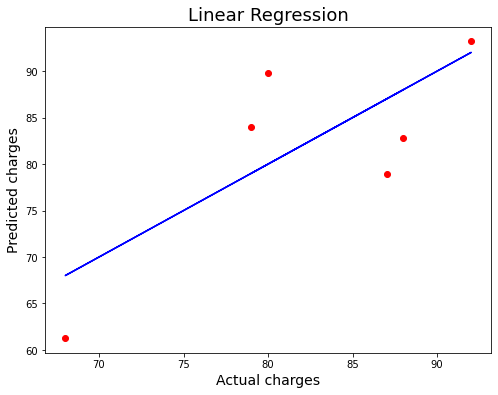

In [82]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

# Saving The Model

In [90]:
import joblib
joblib.dump(enr,'enrfile.obj')
enr_from_joblib=joblib.load('enrfile.obj')
enr_from_joblib.predict(x_test)

array([83.37025633, 90.54800972, 92.3841721 , 62.16339624, 76.7822465 ,
       81.68243212])